作业1：求函数f(x)=(x-1)^2和f(x,y)=(x-2)^2+(y-3)^2的极值点

Please input the function: (x-1)^2
Iteration 1 : 	 x  = -3.519240897960
Iteration 11 : 	 x  = 0.514749757246
Iteration 21 : 	 x  = 0.947896205616
Iteration 31 : 	 x  = 0.994404951366
Iteration 41 : 	 x  = 0.999398789915
Iteration 51 : 	 x  = 0.999934999246
Iteration 61 : 	 x  = 0.999992574284
Final Result :  Iteration 63 :  {'x': 0.999995067541917} 	f(x) =  2.4329142740290515e-11



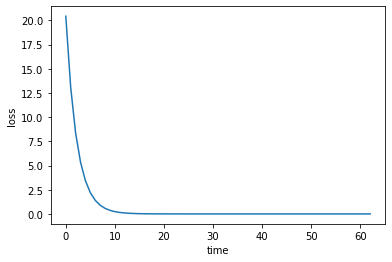

Please input the function: (x-2)^2+(y-3)^2
Iteration 1 : 	 x  = 4.430078172263	 y  = -8.759842569828
Iteration 11 : 	 x  = 2.260927210612	 y  = 1.737296072668
Iteration 21 : 	 x  = 2.028016399581	 y  = 2.864417751910
Iteration 31 : 	 x  = 2.003007791685	 y  = 2.985441520656
Iteration 41 : 	 x  = 2.000322512860	 y  = 2.998436348871
Iteration 51 : 	 x  = 2.000034183242	 y  = 2.999831657926
Iteration 61 : 	 x  = 2.000003224085	 y  = 2.999981478094
Final Result :  Iteration 67 :  {'x': 2.0000004762464654, 'y': 2.9999947756656047} 	f(x,y) =  2.7520480569854823e-11



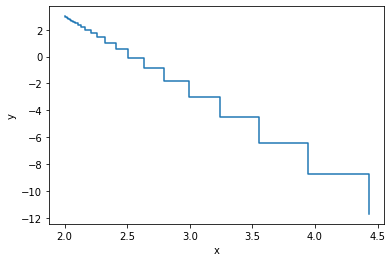

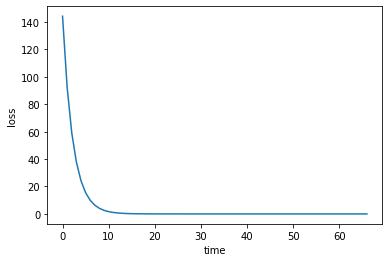

In [3]:
import copy
import random
import re
import matplotlib.pyplot as plt

alpha = 0.1  # 学习率
iterations = 1000  # 迭代次数
epsilon = 0.000001  # 迭代精度


# 计算函数值
def func(var, i):  # var为待更新变量，i为待更新变量值
    # 创建表达式副本
    e = copy.deepcopy(expression)
    # 将表达式中的变量替换为对应值
    if var != "":
        e = e.replace(var, str(i))
    for v in var_list:
        e = e.replace(v, str(var_dic[v]))
    return eval(e)


# 提取函数中的所有变量名称
def extract_variables():
    variables = re.findall(r'[a-zA-Z_]\w*', expression)  # 使用正则表达式匹配单词边界的单词
    return list(set(variables))


# 定义函数的导数
def derivative(var, i):  # var为待更新变量，i为待更新变量值
    return (func(var, i + epsilon) - func(var, i)) / epsilon


for time in range(2):
    loss = []
    x = []
    y = []
    expression = input("Please input the function: ").replace("^", "**")
    var_list = []  # 表达式中所有变量的列表
    var_dic = {}  # var_list中每个变量对应的极值点
    var_list = extract_variables()  # 提取函数中的所有变量名称
    var_list.sort()  # 列表排序
    for v in var_list:  # 随机初始化每个变量的极值点
        var_dic[v] = random.uniform(-20, 20)

    # 梯度下降算法
    for i in range(iterations):
        # 计算梯度
        grad = {}
        for j in var_list:
            grad[j] = derivative(j, var_dic[j])

        # 更新参数
        x_new = {}
        for k in var_list:
            x_new[k] = var_dic[k] - alpha * grad[k]
            # 二元函数时记录(x,y)变化
            if len(var_list) == 2:
                if k == var_list[0]:
                    x.append(x_new[var_list[0]])
                    y.append(var_dic[var_list[1]])
                else:
                    x.append(x_new[var_list[0]])
                    y.append(x_new[var_list[1]])
        # 每个点都小于设定迭代精度时退出循环
        flag = 1
        for l in var_list:
            if abs(x_new[l] - var_dic[l]) >= epsilon:
                flag = 0
        if flag:
            break
        # 更新极值点
        for m in var_list:
            var_dic[m] = x_new[m]
        # 记录损失函数
        loss.append(func("", 0))
        # 输出迭代结果
        if i % 10 == 0:
            print("Iteration", i + 1, ": ", end='')
            for m in var_list:
                print("\t", m, " =", format(var_dic[m], ".12f"), end='')
            print()
    # 输出最终的极值点
    print("Final Result :  Iteration", len(loss), ": ", var_dic, "\tf(", end='')
    for i in var_list:
        if i != var_list[-1]:
            print(i, end=",")
        else:
            print(i, end="")
    print(") = ", func("", 0), end="\n\n")
    # 二元函数时绘制点（x,y）的变化图
    if len(var_list) == 2:
        plt.plot(x, y)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()
    # 绘制损失函数随迭代次数的变化图
    plt.plot(loss)
    plt.xlabel("time")
    plt.ylabel("loss")
    plt.show()
    

作业2：线性回归预测房价

1.batch gradient descent： [0.9999327638659484, 2.999999685179454, 5.000000262247245]


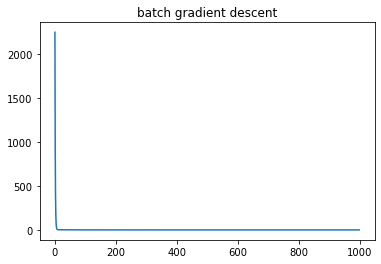


2.stochastic gradient descent： [0.9999294679431174, 2.999999711989337, 5.000000285668939]


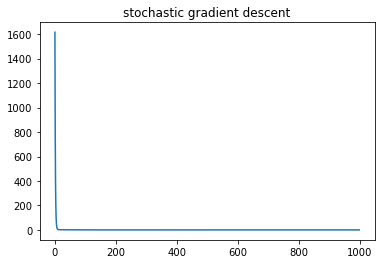

In [7]:
import copy
import random
import matplotlib.pyplot as plt

alpha = 0.00001  # 学习率
num = 1000  # 数据集数量
iterations = 1000  # 迭代次数
expression = "1+3*x1+5*x2"  # 表达式


# 生成1000组数据
def array_init(expression, array_x, array_y):
    for i in range(1000):  # 生成1000组数据
        x1 = random.uniform(-10, 10)
        x2 = random.uniform(-10, 10)
        array_x.append([1, x1, x2])  # 变量值
        e = expression.replace("x1", str(x1)).replace("x2", str(x2))
        array_y.append(eval(e))  # 函数值


# 随机打乱数据
def array_shuffle(array_x, array_y):
    # 使用zip将两个数组的对应元素放在一起
    combined = list(zip(array_x, array_y))
    # 打乱combined列表的顺序
    random.shuffle(combined)
    # 将打乱的结果分离回两个数组
    shuffle_array_x, shuffle_array_y = zip(*combined)
    return shuffle_array_x, shuffle_array_y


# 运行批量梯度下降算法
def batch_gradient_descent(para, grad):
    losses = []  # 记录每次迭代的损失函数值
    for i in range(iterations):
        loss = 0
        for k in range(3):
            grad[k] = 0  # 梯度初始为0
        for j in range(len(array_x)):
            # 计算预测值的函数值
            h = para[0] * array_x[j][0] + para[1] * array_x[j][1] + para[2] * array_x[j][2]
            # 计算梯度
            for k in range(3):
                grad[k] += (h - array_y[j]) * array_x[j][k]
            loss += (h - array_y[j]) ** 2
        # 更新预测值
        for l in range(3):
            para[l] = para[l] - alpha * grad[l]
        # 计算损失函数
        loss /= len(array_x)
        losses.append(loss)
    print("1.batch gradient descent：", para)
    # 绘制损失函数值随迭代次数的变化
    plt.plot(losses)
    plt.title("batch gradient descent")
    plt.show()


# 运行随机梯度下降算法
def stochastic_gradient_descent(para, grad):
    losses = []  # 记录每次迭代的损失函数值
    for i in range(iterations):
        loss = 0  # 梯度初始为0
        for k in range(3):
            grad[k] = 0
        for j in range(len(array_x)):
            # 计算预测值的函数值
            h = para[0] * array_x[j][0] + para[1] * array_x[j][1] + para[2] * array_x[j][2]
            # 计算梯度
            for k in range(3):
                grad[k] = (h - array_y[j]) * array_x[j][k]
            loss += (h - array_y[j]) ** 2
            # 更新预测值
            for l in range(3):
                para[l] = para[l] - alpha * grad[l]
        # 计算损失函数
        loss /= len(array_x)
        losses.append(loss)
    print("\n2.stochastic gradient descent：", para)
    # 绘制损失函数值随迭代次数的变化
    plt.plot(losses)
    plt.title("stochastic gradient descent")
    plt.show()


array_x = []
array_y = []
# 生成1000组数据
array_init(expression, array_x, array_y)
# 随机打乱数据
array_x, array_y = array_shuffle(array_x, array_y)
grad = [0, 0, 0]  # 梯度值
para = []
for i in range(3):  # 随机初始化预测值
    para.append(random.uniform(-10, 10))
# 运行批量梯度下降算法
batch_gradient_descent(copy.deepcopy(para), copy.deepcopy(grad))
# 运行随机梯度下降算法
stochastic_gradient_descent(copy.deepcopy(para), copy.deepcopy(grad))